In [1]:
!pip install -Uqq fastbook

import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 28.5 MB/s 
     |████████████████████████████████| 189 kB 64.2 MB/s 
     |████████████████████████████████| 1.2 MB 51.9 MB/s 
     |████████████████████████████████| 48 kB 6.8 MB/s 
     |████████████████████████████████| 55 kB 5.1 MB/s 
     |████████████████████████████████| 51 kB 437 kB/s 
     |████████████████████████████████| 558 kB 65.9 MB/s 
     |████████████████████████████████| 130 kB 67.6 MB/s 
Mounted at /content/gdrive


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:

import fastai; fastai.__version__
from pathlib import Path
from PIL import Image
from pathlib import Path
from fastai.vision.all import *
import torch
import os


In [4]:
n = len([i for i in os.listdir('/content/gdrive/MyDrive/data/new_mel_spec/normal')])
a = len([i for i in os.listdir('/content/gdrive/MyDrive/data/new_mel_spec/abnormal')])
print(n,a)
w_a = (a + n) / (2.0 * a)
w_n = (a + n) / (2.0 * n)
class_weights=torch.FloatTensor([w_a,w_n]).cuda()

fields = DataBlock(blocks=(ImageBlock, CategoryBlock),get_items=get_image_files,
   get_y=parent_label,splitter=RandomSplitter(valid_pct=0.2, seed=42))
f1=F1Score(pos_label=0)
pr=Precision(pos_label=0)
re=Recall(pos_label=0)
loss_func_new = CrossEntropyLossFlat(weight=class_weights)


2575 665


In [5]:
path_spec = Path('/content/gdrive/MyDrive/data/new')
path_mel_spec = Path('/content/gdrive/MyDrive/data/new_mel_spec')

In [8]:
dls_spec = fields.dataloaders(path_spec, bs=4)
dls_mel_spec = fields.dataloaders(path_mel_spec, bs=4)

In [9]:
learn_spec = cnn_learner(dls_spec, vgg16_bn, metrics=[error_rate,f1,pr,re], loss_func=loss_func_new)
#learn_spec = cnn_learner(dls_spec, resnet18, metrics=[error_rate,f1,pr,re])


SuggestedLRs(valley=0.0020892962347716093)

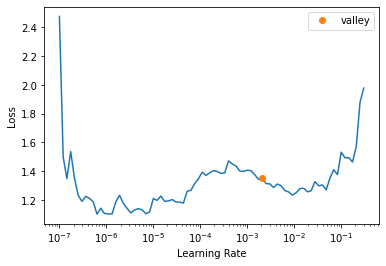

In [10]:
learn_spec.lr_find()

In [11]:
learn_spec.freeze()
learn_spec.fit_one_cycle(9, 5e-3)

epoch,train_loss,valid_loss,error_rate,f1_score,precision_score,recall_score,time
0,0.841298,5.878136,0.800926,0.332046,0.199074,1.000000,18:41
1,1.119708,1.802881,0.186728,0.165517,0.750000,0.093023,18:18
2,0.970609,3.890755,0.199074,0.000000,0.000000,0.000000,18:17
3,0.823947,0.614082,0.233025,0.462633,0.427632,0.503876,18:15
4,0.908530,2.055618,0.762346,0.343085,0.207063,1.000000,18:25
5,0.469072,0.411954,0.134259,0.669202,0.656716,0.682171,18:36
6,0.438510,0.465973,0.121914,0.672199,0.723214,0.627907,18:35


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epoch,train_loss,valid_loss,error_rate,f1_score,precision_score,recall_score,time
0,0.841298,5.878136,0.800926,0.332046,0.199074,1.000000,18:41
1,1.119708,1.802881,0.186728,0.165517,0.750000,0.093023,18:18
2,0.970609,3.890755,0.199074,0.000000,0.000000,0.000000,18:17
3,0.823947,0.614082,0.233025,0.462633,0.427632,0.503876,18:15
4,0.908530,2.055618,0.762346,0.343085,0.207063,1.000000,18:25
5,0.469072,0.411954,0.134259,0.669202,0.656716,0.682171,18:36
6,0.438510,0.465973,0.121914,0.672199,0.723214,0.627907,18:35
7,0.504399,0.369207,0.120370,0.708955,0.683453,0.736434,18:36
8,0.423891,0.350092,0.128086,0.706714,0.649351,0.775194,18:36


SuggestedLRs(valley=0.0003311311302240938)

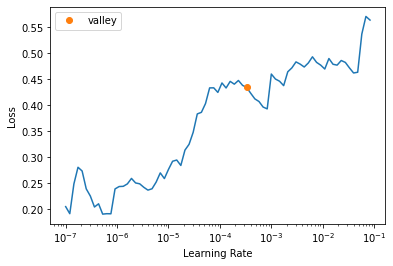

In [12]:
learn_spec.lr_find()

In [ ]:
learn_spec.unfreeze()
learn_spec.fit_one_cycle(8, lr_max=slice(9e-5,3e-4))

In [ ]:
interpret_spec=ClassificationInterpretation.from_learner(learn_spec)

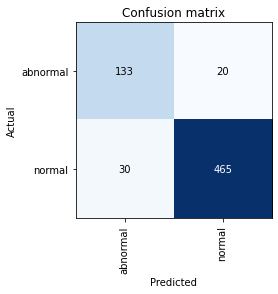

In [ ]:
interpret_spec.plot_confusion_matrix()

In [ ]:
learn_spec.export(r'/content/gdrive/MyDrive/data/new/model_spec_three.pkl')


In [ ]:
learner_mel_spec= load_learner(Path(r'/content/gdrive/MyDrive/data/new/model_spec_three.pkl'))
learner_mel_spec.dls = dls_mel_spec

SuggestedLRs(valley=0.0003311311302240938)

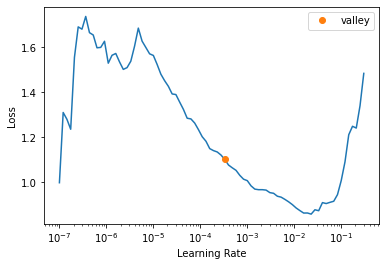

In [ ]:
learner_mel_spec.lr_find()

In [ ]:
learner_mel_spec.freeze()
learner_mel_spec.fit_one_cycle(5, 3e-3)

epoch,train_loss,valid_loss,error_rate,f1_score,precision_score,recall_score,time
0,0.220379,0.569691,0.265432,0.558974,0.417625,0.844961,00:36
1,0.351729,0.331324,0.171296,0.672566,0.542857,0.883721,00:36
2,0.252033,0.354015,0.192901,0.655647,0.508547,0.922481,00:36
3,0.203920,0.295658,0.120370,0.746753,0.642458,0.891473,00:36
4,0.141210,0.318011,0.103395,0.763251,0.701299,0.837209,00:36


SuggestedLRs(valley=4.786300905834651e-06)

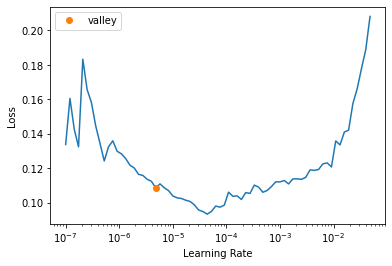

In [ ]:
learner_mel_spec.lr_find()

In [ ]:
learner_mel_spec.unfreeze()
learner_mel_spec.fit_one_cycle(10, lr_max=slice(1e-7,5e-6))

epoch,train_loss,valid_loss,error_rate,f1_score,precision_score,recall_score,time
0,0.121340,0.326961,0.106481,0.750903,0.702703,0.806202,00:46
1,0.125542,0.314284,0.104938,0.758865,0.699346,0.829457,00:46
2,0.123943,0.312172,0.108025,0.755245,0.687898,0.837209,00:46
3,0.104300,0.324974,0.103395,0.758123,0.709459,0.813953,00:46
4,0.111477,0.313562,0.104938,0.760563,0.696774,0.837209,00:46
5,0.103116,0.306081,0.106481,0.761246,0.687500,0.852713,00:46
6,0.096168,0.308748,0.104938,0.762238,0.694268,0.844961,00:46
7,0.093883,0.310356,0.104938,0.762238,0.694268,0.844961,00:46
8,0.102175,0.317883,0.103395,0.763251,0.701299,0.837209,00:46
9,0.096261,0.320716,0.101852,0.764286,0.708609,0.829457,00:46


SuggestedLRs(valley=6.30957365501672e-05)

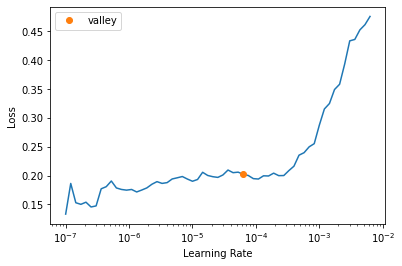

In [ ]:
learner_mel_spec.lr_find()

In [ ]:
learner_mel_spec.fit_one_cycle(4, lr_max=slice(7e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,f1_score,precision_score,recall_score,time
0,0.275619,0.547696,0.239198,0.573003,0.444444,0.806202,01:18
1,0.351927,0.382559,0.226852,0.629723,0.466418,0.968992,01:17
2,0.279529,0.307346,0.123457,0.727891,0.648485,0.829457,01:17
3,0.183470,0.349260,0.112654,0.734545,0.691781,0.782946,01:18
